In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_toy' 'curriculum' 'lora_testing_degree'
 'lora_testing_shared_roots' 'prompting_degree' 'prompting_shared_roots']
                                 run_id                      task  \
3                   small-1-11-5M-steps  kernel_linear_regression   
2                                model1  kernel_linear_regression   
4                                   old  kernel_linear_regression   
5  7f3d8135-fcb1-4f82-bed6-041508e56589                      lora   
6  f214d84d-3dad-4326-aa86-5dd04b09ae53                      lora   
0  49c6a6c8-435d-4096-a5a9-45d86c10fd23            soft_prompting   
1  6da1d7cd-bc48-4b91-9809-c0e0e59ecd06            soft_prompting   

                       model  \
3          Transformer-small   
2           Transformer-plus   
4           Transformer-plus   
5        lora_testing_degree   
6  lora_testing_shared_roots   
0           prompting_degree   
1     prompting_shared_roots   

                                              

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
3,small-1-11-5M-steps,kernel_linear_regression,Transformer-small,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,6,4,chebyshev_linear_regression_toy
2,model1,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,24,16,curriculum
4,old,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,24,16,curriculum
5,7f3d8135-fcb1-4f82-bed6-041508e56589,lora,lora_testing_degree,basis_dim=5_different_degrees=False_highest_de...,-1,-1,1,6,4,lora_testing_degree
6,f214d84d-3dad-4326-aa86-5dd04b09ae53,lora,lora_testing_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,lora_testing_shared_roots
0,49c6a6c8-435d-4096-a5a9-45d86c10fd23,soft_prompting,prompting_degree,basis_dim=5_different_degrees=False_highest_de...,-1,-1,1,6,4,prompting_degree
1,6da1d7cd-bc48-4b91-9809-c0e0e59ecd06,soft_prompting,prompting_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,prompting_shared_roots


In [7]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "7f3d8135-fcb1-4f82-bed6-041508e56589"  # if you train more models, replace with the run_id from the table above
#run_id = "lr_00005"
run_path = os.path.join(run_dir, "lora", run_id)


run_id_big = "small-1-11-5M-steps"
run_path_big = os.path.join(run_dir, task, run_id_big)

#run_id_noise_2 = "0.25x-micro-no-noise-batch-8192-basis-1-4-500k"
#run_path_noise_2 = os.path.join(run_dir, task, run_id_noise_2) 


#run_path = '/home/riadoshi/CS182Project/models/kernel_linear_regression/cde31f7a-93a0-4aa6-b833-37e178b50ae4' # enter the path to the downloaded checkpoint here
metrics = get_run_metrics(run_path, step=4000, run_path_2=run_path_big, include_noise=False, ground_truth_loss=False, smoothing=0.00, device="cpu")  # these are normally precomputed at the end of training


AttributeError: cannot assign module before Module.__init__() call

# Plot pre-computed metrics

../models
chebyshev_linear_regression_toy soft-prompting-test-6
torch.Size([1, 128])
PROMPT:  tensor([[[0.8780],
         [0.2665],
         [0.6323],
         [0.1253],
         [0.2460],
         [0.2789],
         [0.1814],
         [0.5925],
         [0.0493],
         [0.2297],
         [0.6476],
         [0.8623],
         [0.3821],
         [0.7960],
         [1.0132],
         [0.5370],
         [0.1190],
         [0.5629],
         [0.0410],
         [0.0983]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(17.3108, grad_fn=<CopyBackwards>)
total norm:  tensor(41.9293, grad_fn=<CopyBackwards>)
../models/soft_prompting/soft-prompting-test-6/metrics.json
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
{'degree-4': {'chebyshev_4_driver=None': {'mean': [0.28616684675216675, 0.24343135952949524, 0.16736528277397156, 0.07440228760242462, 0.02121327631175518, 1.5342988263000734e-05, 1.1489749152104878e-09, 8.341159707381252e-11, 1.2435179622127812e-11, 6.601573129295935e-13, 2.0534828

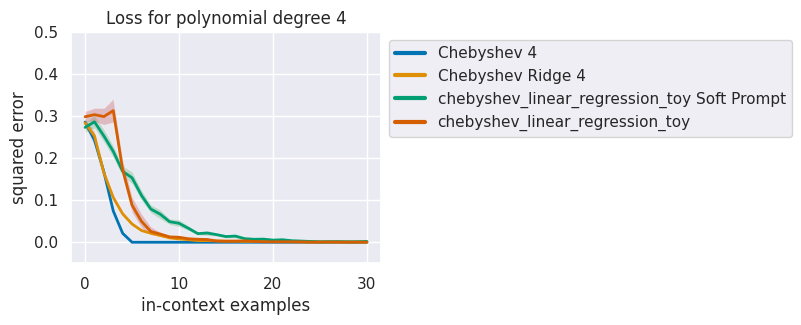

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


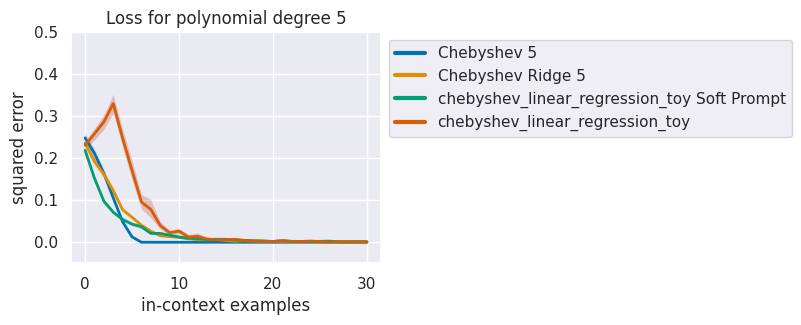

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


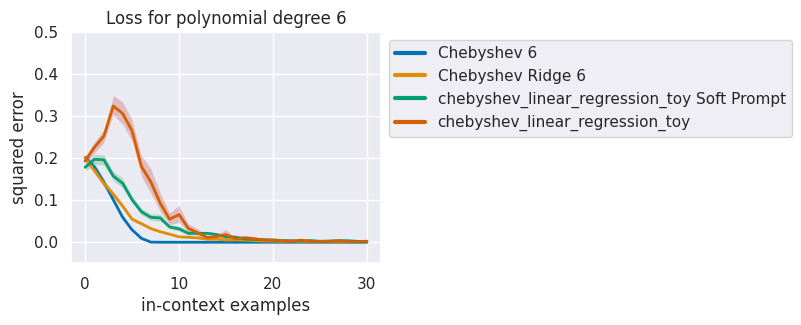

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


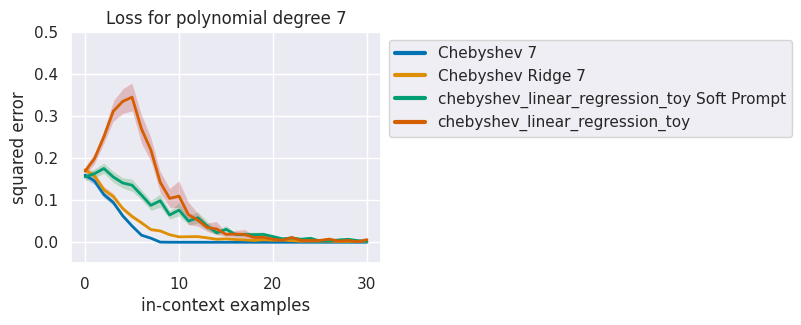

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


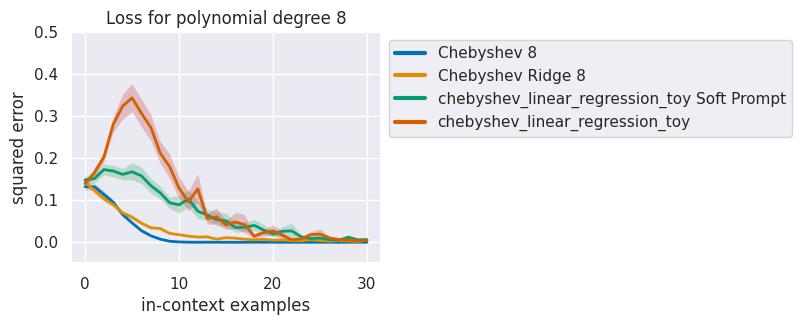

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


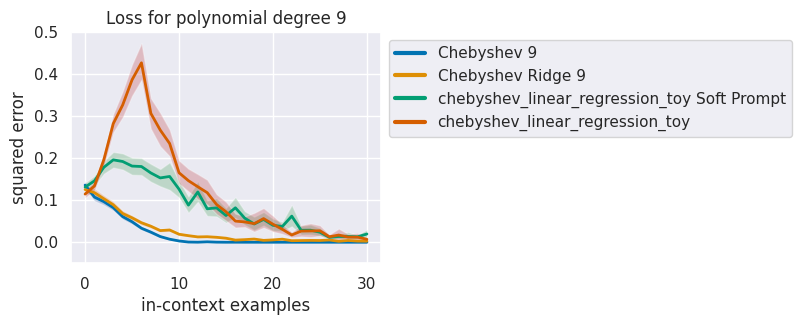

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


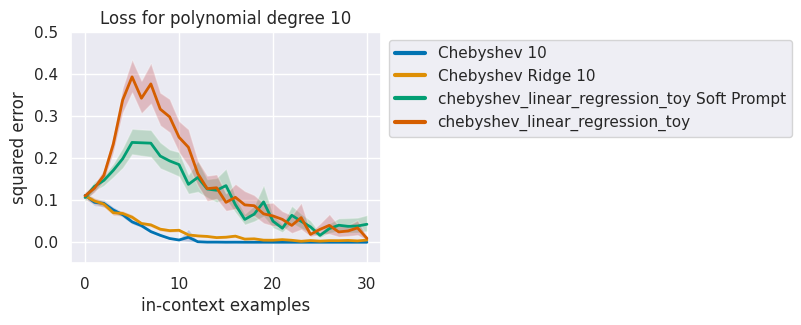

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


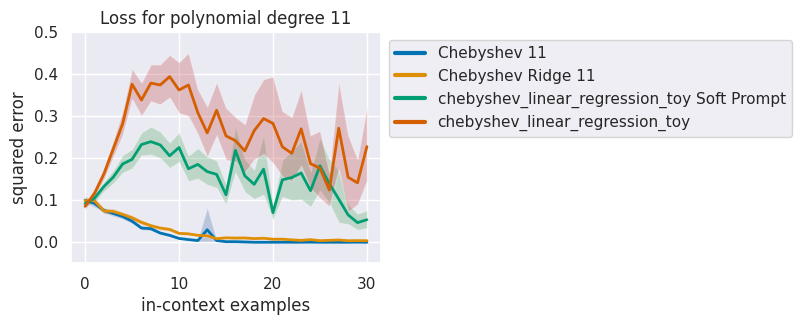

In [5]:
def valid_row(r, run_id):
    return r.task == "soft_prompting" and r.run_id == run_id

print(run_dir)
metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)

#metrics_smooth = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.01)
#metrics_big = collect_results(run_dir, df, valid_row= lambda x: valid_row(x, run_id_big), smoothing=0.00)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

#for k, v in metrics_big.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2] = v2
#for k, v in metrics_smooth.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2+ " Smoothed"] = v2

ylims = [2, 2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
for degree in range(4, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()